In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def RungeKuttaOneOne( scaler, tolerence, function ):
    return tolerence * function( scaler )

def RungeKuttaOneTwo( scaler, tolerence, function ):
    return tolerence * function( scaler + RungeKuttaOneOne( scaler, tolerence, function ) / 2.0 )

def RungeKuttaOneThree( scaler, tolerence, function ):
    return tolerence * function( scaler + RungeKuttaOneTwo( scaler, tolerence, function ) / 2.0 )

def RungeKuttaOneFour( scaler, tolerence, function ):
    return tolerence * function( scaler + RungeKuttaOneThree( scaler, tolerence, function ) )

def RungeKuttaOneTaylor( scaler, tolerence, function ):
    return ( ( 1.0 / 6.0 ) * ( RungeKuttaOneOne( scaler, tolerence, function ) + ( 2.0 * (
                              RungeKuttaOneTwo( scaler, tolerence, function ) + 
                              RungeKuttaOneThree( scaler, tolerence, function ) ) ) + 
                              RungeKuttaOneFour( scaler, tolerence, function ) ) )

def RungeKuttaOneVector( vector, tolerence, function, rungeKuttaFunction ):
    resultVector = [ 0 ] * len( vector )
    for i in range( len( vector ) ):
        resultVector[ i ] = rungeKuttaFunction( vector[ i ], tolerence, function )
    return resultVector

In [22]:
#XDot
def Velocity( velocity ):
    return velocity

#VDot
def Acceleration( position, k = 3.0, velocity = 0.0, b = 0.0, mass = 1.0 ):
    return ( -b * velocity - k * position ) / mass

In [23]:
def HarmonicOscillatorFirstOrder( resolution, steps ):
    n = steps
    time = np.zeros( n + 1 )
    position = np.zeros( n + 1 )
    velocity = np.zeros( n + 1 )
    position[ 0 ] = 1
    velocity[ 0 ] = 0

    for i in range( n ):
        position[ i + 1 ] = position[ i ] + RungeKuttaOneOne( velocity[ i ], resolution, Velocity )
        velocity[ i + 1 ] = velocity[ i ] + RungeKuttaOneOne( position[ i ], resolution, Acceleration )
        time[ i + 1 ] = time[ i ] + resolution
    plt.plot( time, position )


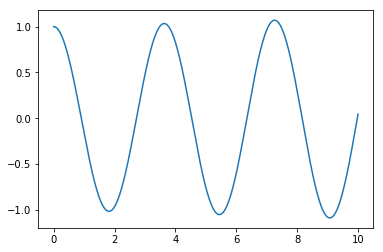

In [24]:
scaller = 8
HarmonicOscillatorFirstOrder( .05 / float( scaller ), scaller * 200 )

In [25]:
def HarmonicOscillatorFourthOrder( resolution, steps ):
    n = steps
    time = np.zeros( n + 1 )
    position = np.zeros( n + 1 )
    velocity = np.zeros( n + 1 )
    position[ 0 ] = 1
    velocity[ 0 ] = 0

    for i in range( n ):
        position[ i + 1 ] = position[ i ] + RungeKuttaOneTaylor( velocity[ i ], resolution, Velocity )
        velocity[ i + 1 ] = velocity[ i ] + RungeKuttaOneTaylor( position[ i ], resolution, Acceleration )
        time[ i + 1 ] = time[ i ] + resolution
    plt.plot( time, position )


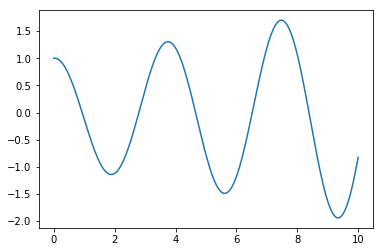

In [26]:
scaller = 1
HarmonicOscillatorFourthOrder( .05 / float( scaller ), scaller * 200 )

In [27]:
def RungeKuttaOneGeneral( initialTime, endTime, steps, function ):
    position = np.zeros( steps + 1 )
    time = np.zeros( steps + 1 )
    position[ 0 ] = 1
    time[ 0 ] = 0
    resolution = ( endTime - initialTime ) / steps
    for i in range( steps ):
        position[ i + 1 ] = position[ i ] + RungeKuttaOneTaylor( position[ i ], resolution, function )
        time[ i + 1 ] = time[ i ] + resolution
    return ( position, time )

In [28]:
def f( position ):
    return 2.0 - ( np.sin( position ) ** 2 )

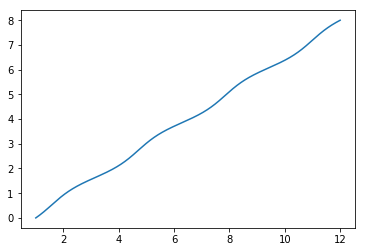

In [29]:
plt.plot( *RungeKuttaOneGeneral( 0.0, 8.0, 5000, f ) )